# Ejercicio 1 kmeans

Realizar estudios exploratorios de los datos usando análisis cluster y empleando el algoritmo de K-means o K-medias. Para ello habrá que:
- Procesar los datos. En esta etapa se seleccionarán las variables que sean relevantes, detectará los outliers y observaciones relevantes.

- Análisis cluster. Se determinará cuántos grupos significativos se pueden encontrar en los datos y se calcularán.

- Realiza una descripción semántica de los patrones encontrados, analizando la importancia de cada grupo y analizando la importancia de las variables en su definición, para ello hay que realizar una descripción estadística de los grupos encontrados.

**Segmentación de clientes - Enunciado:**

https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python. En el dataset se encuentran datos relativos a clientes de un centro comercial (género, edad, ingresos anuales, puntuación de gasto (asignada por el centro comercial)). El objetivo es categorizar los clientes.

## Importación de las librerías necesarias

In [3]:
from google.colab import drive
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


## Procesamiento y elección de variables para el estudio

Importo el dataset.

In [4]:
drive.mount('/content/drive')

df_clientes = pd.read_csv('/content/drive/MyDrive/IABD/SAA/datasets/Tema 3/Mall_Customers.csv')

Mounted at /content/drive


Muestro las primeras y últimas filas del datasets.

In [5]:
df_clientes

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### Análisis estadístico

Estudiamos los tipos de datos que tienen los atributos del datasets.

Podemos ver que existe un atributo categórico y 4 numéricos. Ninguno de los atributos tiene un valor null y tiene 200 ocurrencias.

In [6]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#### CustomerID

Realizamos un estudio estadístico.

En un principio este atributo no tiene sentido para el entrenamiento porque vemos que el valor más pequeño es 1 mientras que el máximo es 200, pero ya veremos que nos dice el mapa de calor. Este valor es el número de ocurrencias que tiene el datasets. Esto quiere decir que el atributo no es identificativo para el cliente.

In [7]:
df_clientes['CustomerID'].describe()

,CustomerID
count,200.000000
mean,100.500000
std,57.879185
min,1.000000
25%,50.750000
50%,100.500000
75%,150.250000
max,200.000000


#### Gender

Estudio estadístico.

Tiene dos valores unicos que son Female (Mujer) y Male (Hombre). El valor que más se repite es Female con un total de 112 mientras que el valor Male tiene 88 ocurrencias.

In [8]:
df_clientes.Gender.describe()

,Gender
count,200
unique,2
top,Female
freq,112


In [9]:
df_clientes.Gender.unique()

array(['Male', 'Female'], dtype=object)

#### Age

Estudio estadístico.

Vemos que el mínimo es 18 y el máximo es 70. De primeras no se ve que existan outliers demasiado extremos. La media de los clientes es de 38 años.

In [10]:
df_clientes.Age.describe()

,Age
count,200.000000
mean,38.850000
std,13.969007
min,18.000000
25%,28.750000
50%,36.000000
75%,49.000000
max,70.000000


#### Annual Income (k$)

Análisis estadístico.

El mínimo es de 15K y el máximo es 137k, de primeras no se ven outliers. También vemos que el cuantil 2/4 se acerca demasiado a la media.

In [11]:
df_clientes['Annual Income (k$)'].describe()

,Annual Income (k$)
count,200.000000
mean,60.560000
std,26.264721
min,15.000000
25%,41.500000
50%,61.500000
75%,78.000000
max,137.000000


#### Spending Score (1 - 100)

Análisis estadístico.

Los valores tienen el rango que se dice y la media de las puntuaciones de los gastos es de 50 puntos.

In [12]:
df_clientes['Spending Score (1-100)'].describe()

,Spending Score (1-100)
count,200.000000
mean,50.200000
std,25.823522
min,1.000000
25%,34.750000
50%,50.000000
75%,73.000000
max,99.000000


### Mapa de calor

El mapa de calor se va a realizar para ver si entre las variables puede existir una relación demasiado grande que los valores puedan ser lo mismos.

**Nota:** En este datasets no tiene pinta de que esto ocurra porque con el estudio anterior se puede ver que no tienen los mismo valores.

<ipython-input-13-ac29f83a5a43>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clientes_copia['Gender'] = df_clientes_copia['Gender'].replace({"Male": 0, "Female": 1})


<Axes: >

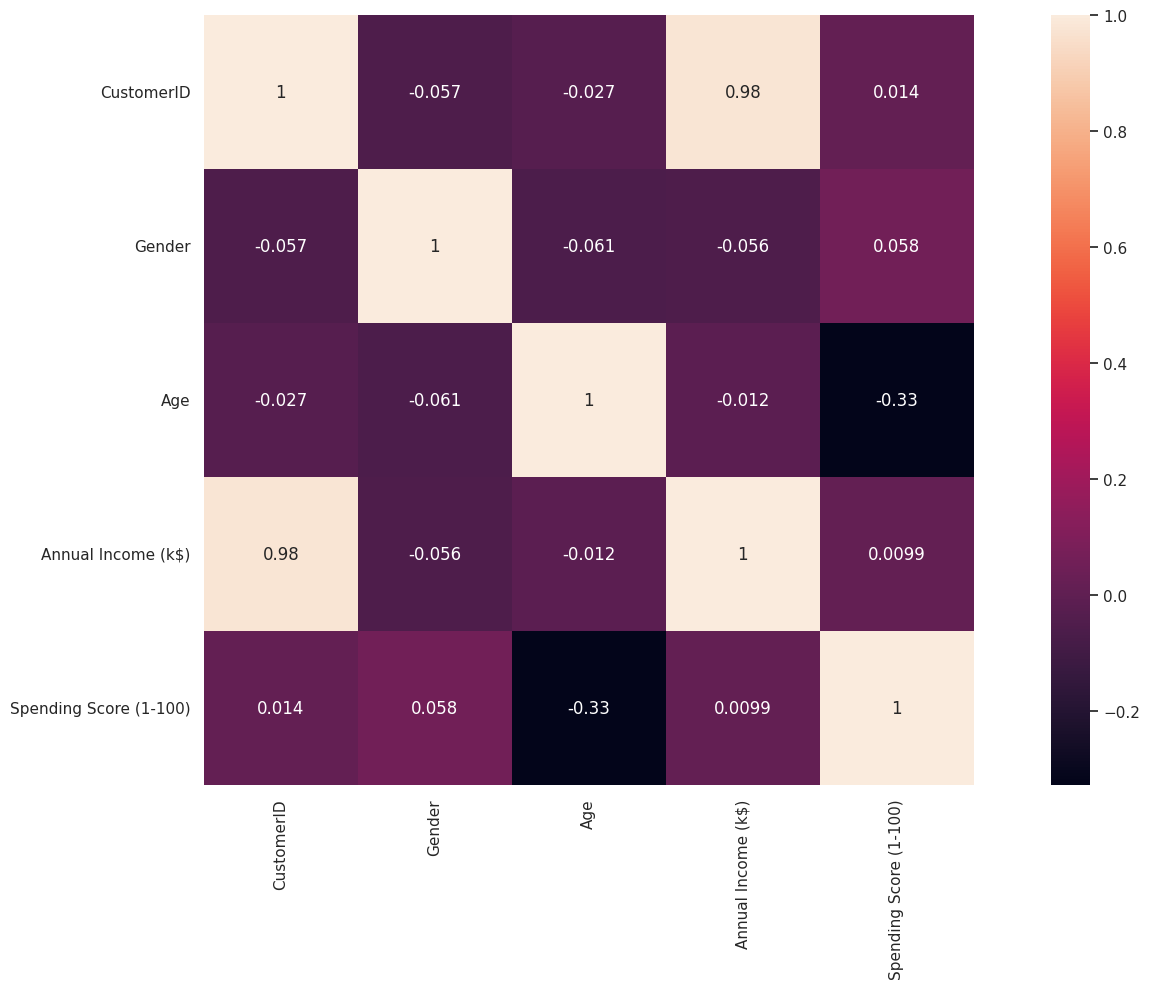

In [13]:
# Primero la variable categórica se va a transformar
df_clientes_copia = df_clientes.copy()
df_clientes_copia['Gender'] = df_clientes_copia['Gender'].replace({"Male": 0, "Female": 1})
# df_clientes_copia = df_clientes_copia.drop("Gender", axis=1)


sns.set(rc={"figure.figsize": (20, 10)})
sns.heatmap(df_clientes_copia.corr(), square = True, annot = True)

Voy a ver porque la viable Annual Income (k$) tienen una relación tan buena. Probablemente sea porque los ingresos están ordenados ascendentemente.

In [14]:
df_clientes[['CustomerID', 'Annual Income (k$)']].head(n=10)

,CustomerID,Annual Income (k$)
0,1,15
1,2,15
2,3,16
3,4,16
4,5,17
5,6,17
6,7,18
7,8,18
8,9,19
9,10,19


In [15]:
df_clientes[['CustomerID', 'Annual Income (k$)']].tail(n=10)

,CustomerID,Annual Income (k$)
190,191,103
191,192,103
192,193,113
193,194,113
194,195,120
195,196,120
196,197,126
197,198,126
198,199,137
199,200,137


### Argumentación de las variables elegidas

Las variables elegidas son **Gender, Age, Annual Income (k$) y Spending Score (1 - 100)**. La variable CustormerID no se ha elegido porque no representa nada del cliente, solo el un número identificativo del cliente que probablamente se utilice internamente pero no es útil para el entrenamiento.

La variable Annual Income (k$) tiene una relación muy fuerte con la variable CustomersID porque va en orden ascendente, es decir, que el ID 1 tiene el valor más pequeño de ingresos mientras que el valor máximo del ID tiene el máximo valor de los ingresos.

## Escalamiento y detección de outliers

El escalamiento de las variables se debe realizar porque para el entrenamiento las variables deben estar escaladas y el modelo no le de más importancia a unos datos que a otros. Ademas se tiene que transformar la variables categóricas.

### Transformación variables categóricas

Tranformo las variables categóricas en una serie de columnas True/False. Además, en este paso elimino la columna CustomerID.

In [16]:
df_clientes_norm = pd.get_dummies(df_clientes).drop("CustomerID", axis=1)

El siguiente paso es buscar los outliers.

In [17]:
N = df_clientes_norm.shape[0]

k = 4

SSE = []


for i in range(0, N):
  X_sin_i = np.delete(df_clientes_norm, i, axis=0)

  kmeans = KMeans(n_clusters=k, n_init=10, random_state=100).fit(X_sin_i)
  SSE.append(kmeans.inertia_)


sigma = np.std(SSE)
mu = np.mean(SSE)

umbral = 2

outliers = []
for i in range(0, N):
  if np.abs(SSE[i]-mu) > umbral*sigma:
    outliers.append(i)

df_sin_outliers = pd.DataFrame(np.delete(df_clientes_norm, outliers, axis=0), columns=df_clientes_norm.columns)
df_sin_outliers

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,False,True
1,21,15,81,False,True
2,23,16,77,True,False
3,31,17,40,True,False
4,22,17,76,True,False
...,...,...,...,...,...
182,32,103,69,True,False
183,33,113,8,False,True
184,38,113,91,True,False
185,47,120,16,True,False


Una vez que tenemos ya los outliers eliminados, vamos a escalar los datos.

In [18]:
scaler = preprocessing.MinMaxScaler()
df_sin_outliers[["Age", "Annual Income (k$)", "Spending Score (1-100)"]] = scaler.fit_transform(df_sin_outliers.drop(["Gender_Female", "Gender_Male"], axis=1))

df_sin_outliers

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,0.019231,0.000000,0.387755,False,True
1,0.057692,0.000000,0.816327,False,True
2,0.096154,0.009524,0.775510,True,False
3,0.250000,0.019048,0.397959,True,False
4,0.076923,0.019048,0.765306,True,False
...,...,...,...,...,...
182,0.269231,0.838095,0.693878,True,False
183,0.288462,0.933333,0.071429,False,True
184,0.384615,0.933333,0.918367,True,False
185,0.557692,1.000000,0.153061,True,False


## Ejecución de análisis cluster con un valor de k concreto (número de grupos), por ejemplo 4, y determinar el número de réplicas (n_init) del algoritmo que conduce a que la repetición de dicho algoritmo genere la misma solución.

In [19]:
k = 4

# 3. Evaluar la estabilidad con distintos valores de n_init
previous_centers = None
stable_n_init = None

for n_init in range(1, 21):  # Probamos de 1 a 20 inicializaciones
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=n_init)
    kmeans.fit(df_sin_outliers)
    current_centers = np.sort(kmeans.cluster_centers_, axis=0)  # Ordenamos para comparación

    if previous_centers is not None:
        if np.allclose(previous_centers, current_centers, atol=1e-4):  # Comparación de centros
            stable_n_init = n_init
            break  # Se encontró el mínimo n_init que da resultados estables

    previous_centers = current_centers

print(f"El número mínimo de n_init que genera soluciones consistentes es: {stable_n_init}")

El número mínimo de n_init que genera soluciones consistentes es: 4


## Determinar el valor de k (número de grupos)

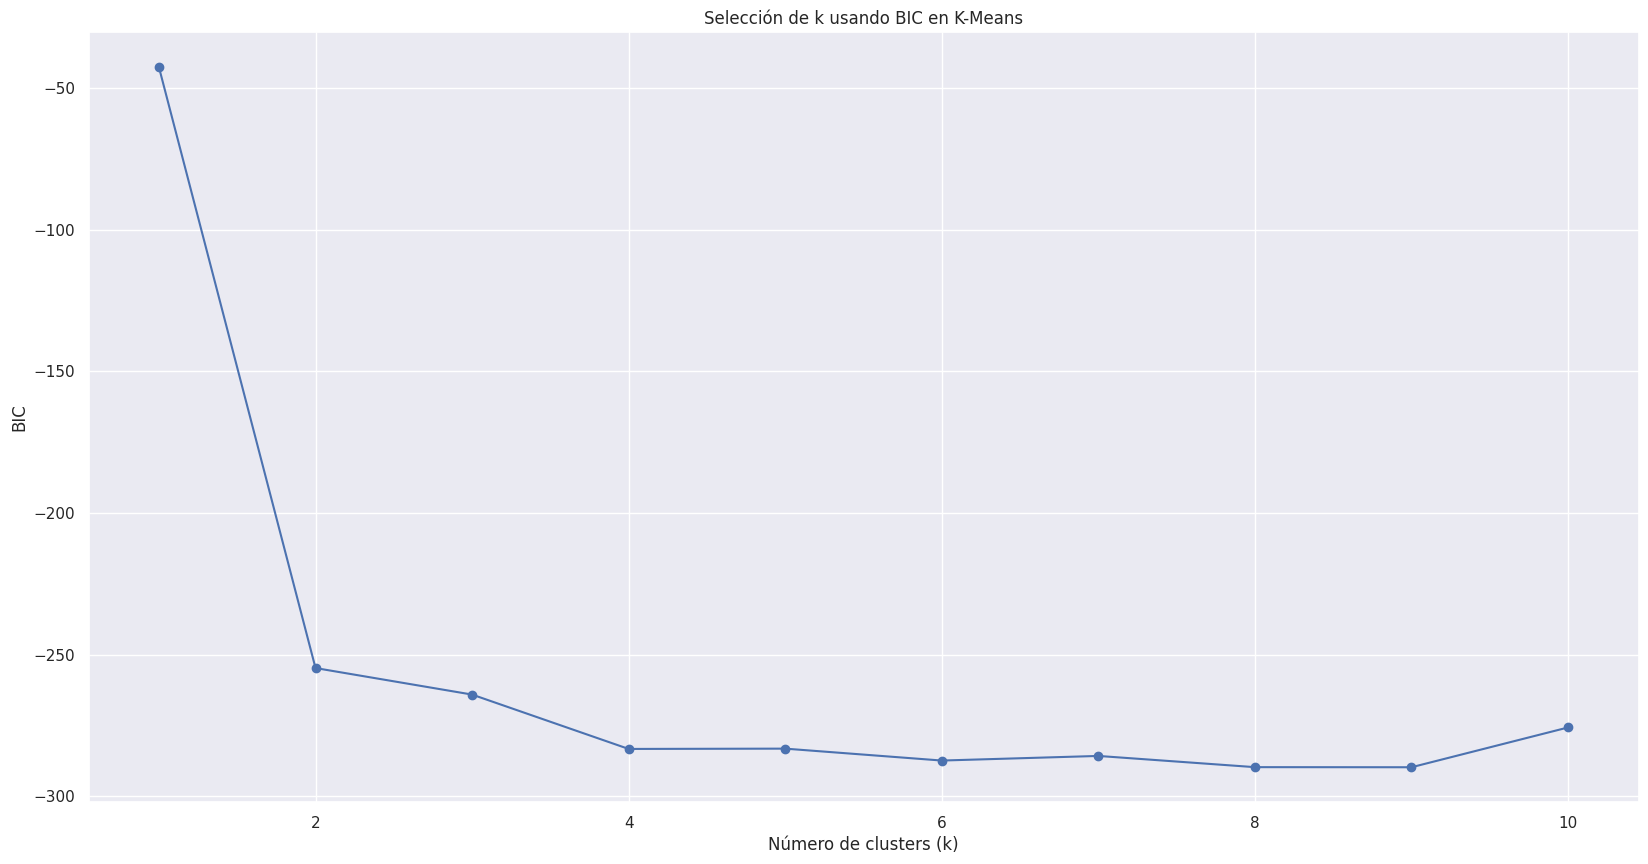

El número óptimo de clusters según BIC es: 9


In [20]:
def bic_kmeans(X, max_k=10):
    n, d = X.shape
    bics = []
    k_values = range(1, max_k+1)

    for k in k_values:
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
        kmeans.fit(X)
        SSE = kmeans.inertia_

        # Número de parámetros
        p = k * (d + 1)

        # Calcular BIC
        bic = n * np.log(SSE / n) + p * np.log(n)
        bics.append(bic)

    return k_values, bics

# Calcular BIC para diferentes valores de k
k_values, bics = bic_kmeans(df_sin_outliers)

# Graficar el BIC
plt.plot(k_values, bics, marker='o', linestyle='-')
plt.xlabel("Número de clusters (k)")
plt.ylabel("BIC")
plt.title("Selección de k usando BIC en K-Means")
plt.show()

# Mejor k (mínimo BIC)
best_k = k_values[np.argmin(bics)]
print(f"El número óptimo de clusters según BIC es: {best_k}")


## Ejecución de análisis con los datos calculados (k y n_init)

El número mínimo de n_init que genera soluciones consistentes para k = 9 es: 2


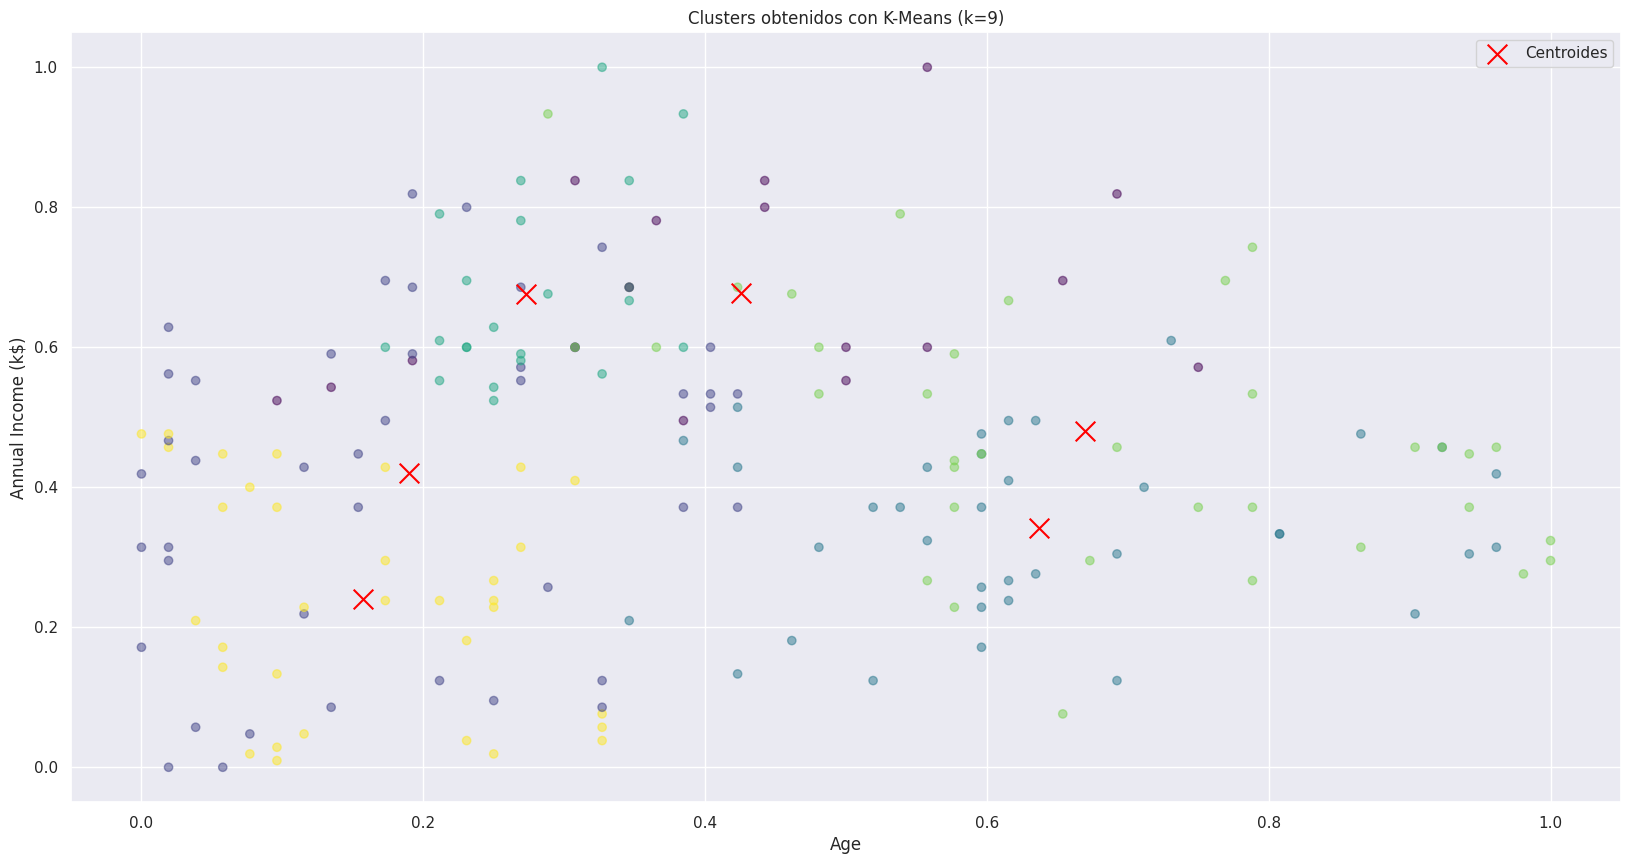

In [21]:
k = 9

previous_centers = None
stable_n_init = None

for n_init in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=n_init)
    kmeans.fit(df_sin_outliers)
    current_centers = np.sort(kmeans.cluster_centers_, axis=0)

    if previous_centers is not None:
        if np.allclose(previous_centers, current_centers, atol=1e-4):
            stable_n_init = n_init
            break

    previous_centers = current_centers

print(f"El número mínimo de n_init que genera soluciones consistentes para k = {k} es: {stable_n_init}")

kmeans = KMeans(n_clusters=6, n_init=3, random_state=1)
kmeans.fit(df_sin_outliers)

labels = kmeans.labels_

centroids = kmeans.cluster_centers_

plt.scatter(df_sin_outliers.iloc[:, 0], df_sin_outliers.iloc[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label="Centroides")
plt.xlabel(df_sin_outliers.columns[0])
plt.ylabel(df_sin_outliers.columns[1])
plt.title(f"Clusters obtenidos con K-Means (k={k})")
plt.legend()
plt.show()


## Mostrar para el análisis anterior una tabla con los siguientes datos: número de grupo, cantidad de observaciones de ese grupo y el centroide que representa a ese grupo (valor de cada variable)

In [22]:
# Obtener etiquetas de los clusters
labels = kmeans.labels_

# Obtener los centroides
centroids = kmeans.cluster_centers_

data = []

k = 6

for i in range(k):
    cluster_data = df_sin_outliers[labels == i]

    count = len(cluster_data)

    centroid = centroids[i]

    data.append([i, count, *centroid])

df_cluster_info = pd.DataFrame(data, columns=['Número de grupo', 'Cantidad de observaciones', 'Centroide: Edad', 'Centroide: Salario Anual (k$)', 'Centroide: Puntuación', 'Centroide: Género femenino', 'Centroide: Género masculino'])

df_cluster_info

,Número de grupo,Cantidad de observaciones,Centroide: Edad,Centroide: Salario Anual (k$),Centroide: Puntuación,Centroide: Género femenino,Centroide: Género masculino
0,0,17,0.425339,0.677871,0.232293,1.000000e+00,0.000000e+00
1,1,44,0.189685,0.419913,0.644944,5.551115e-16,1.000000e+00
2,2,36,0.637286,0.341534,0.436224,1.000000e+00,5.551115e-17
3,3,21,0.272894,0.676644,0.823129,1.000000e+00,0.000000e+00
4,4,36,0.669872,0.480159,0.338719,4.440892e-16,1.000000e+00
5,5,33,0.157343,0.240404,0.613482,1.000000e+00,0.000000e+00


## Realizar una descripción semántica de los grupos

## Grupo 0
Tiene un total de 17 observaciones y parece representar a mujeres jóvenes con ingresos medios-altos, pero con bajo nivel de gasto.
- Edad baja
- Salario medio-alto
- Baja puntuación de gasto
- Totalmente compuesto por mujeres

### Grupo 1
Tiene un total de 44 observaciones y parece que representa a hombres jóvenes con ingresos modestos, pero con alto nivel de gasto.
- Edad muy baja
- Salario medio-bajo
- Alta puntuación de gasto
- Totalmente compuesto por hombres

### Grupo 2
Tiene un total de 36 observaciones y parece que representa a mujeres mayores con ingresos bajos y un gasto moderado.
- Edad alta
- Salario bajo
- Puntuación de gasto media
- Totalmente compuesto por mujeres

### Grupo 3
Tiene un total de 21 observaciones y parece que representa a mujeres de mediana edad con ingresos altos y con un alto nivel de gasto.
- Edad media-baja
- Salario medio-alto
- Puntuación de gasto muy alta
- Totalmente compuesto por mujeres

### Grupo 4
Tiene un total de 36 observaciones y parece que representa a hombres mayores con ingresos medios, pero con un bajo nivel de gasto.
- Edad alta
- Salario medio
- Baja puntuación de gasto
- Totalmente compuesto por hombres

### Grupo 5
Tiene un total de 33 observaciones y parece que representa a  ujeres muy jóvenes con ingresos bajos, pero con un alto nivel de gasto.

- Edad muy baja
- Salario muy bajo
- Puntuación de gasto alta
- Totalmente compuesto por mujeres
- Posible interpretación: Mujeres muy jóvenes con ingresos bajos, pero con un alto nivel de gasto.